
# Natural Language Processing  Assignment #1 Fall 2023 
## Due September 20th, 2023  11:59pm CST
## Student Name:<font color='red'> Rishabh Shukla </font>
Regular Expressions, Tokenization and Normalization, Dynamic Programming, Document Classification, Perplexity

* Getting started on cheaha: https://docs.uabgrid.uab.edu/wiki/Cheaha_GettingStarted
* Instructions on running Jupyter Notebook on cheaha: https://docs.uabgrid.uab.edu/wiki/Jupyter#Jupyter_on_Cheaha
* IPython notebooks: https://ipython.org/ipython-doc/3/notebook/notebook.html#introduction

<font color="red">Do not forget to answer the written questions! </font>Just coding will not get you full points. You can answer the questions in the same text box as they are asked.

As of the time of writing, a suitable conda environment with NLTK and other needed libraries should be or should be soon available as a Jupyter kernel - "nlp2022" or "DeepPhe". Ambitious students may still want to learn to create their own environment, but code should work in the provided environment. Instructions for creating your own custom environment on cheaha are provided below:
https://docs.uabgrid.uab.edu/wiki/Jupyter#Adding_Custom_Conda_Environments_to_Jupyter

Note: I give "hints" via imports, but not all imports are shown.

Submission will be via Canvas. Attempt all questions, butn not all questions may be marked.

##  1. De-identification with Regular Expressions (20 points)

You started working for a company that needs to scrub identifiers from user uploaded files in order to comply with EU General Data Protection Regulation (GDPR) . A beta version of a piece of de-identification software used in the United States removed physicians name, patient names and some location names from the note below, but failed to location and some date information. 


* Write a regular expression/s to replace ALL date and location references with XX/XX/XXXX and XXXXX respectively. 

* Make use of a dictionary (small set of terms) to assist with this. 

Your regular expressions should work for this note, but not be so specific that they are unlikely to be useful on other notes. 

* Print before and after documents.


In [1]:
import os;
import re;
fakedoc = """
                XXXXXX, XXXXXXX
                ##########
                London Clinic
                XXXXX 
                XXXXX, W1G 6BW
                Date 07/01/2023
        
NEUROLOGY AND PAIN MEDICINE
INITIAL OUTPATIENT NOTE

XXXXXX, XXXXXX
PATIENT HISTORY
Ms. XXXXXX is a 56y women seen in consultation at the request of Dr. XXXXXXXXXX. The patient is alert 
and orinted to self, place and cirumstance. She self-reports stress due the lingering effects of the
her 17 year-old son's suicide and has difficulty continuing her work. Denies depression, SI. PMH BPD.

Consitution: Well developed, well nourished in no apparent distress.

Assessment: Fibromyalgia, stress

TREATMENT/PLAN:
Duloxetine
Suggested finding more time for exercise and sleep for stress

REFERRING PHYSICIAN
XXXXXX, XXXXXX, MD

Electronially signed by XXXXXX, XXXXXX DO, PhD on 07/02/2023
"""
print(fakedoc)


# Write regular expression/s here, be as general as possible with your regular expression

date_pattern = r'\b(\d{2}/\d{2}/\d{4})\b'

fakedoc = re.sub(date_pattern, 'XX/XX/XXXX', fakedoc)

# Dictionary for replacement
replacement_dict = {
    "London Clinic": "XXXXX",
    "W1G 6BW": "XXXXX",
}

for item, replacement in replacement_dict.items():
    fakedoc = fakedoc.replace(item, replacement)
print(fakedoc)


                XXXXXX, XXXXXXX
                ##########
                London Clinic
                XXXXX 
                XXXXX, W1G 6BW
                Date 07/01/2023
        
NEUROLOGY AND PAIN MEDICINE
INITIAL OUTPATIENT NOTE

XXXXXX, XXXXXX
PATIENT HISTORY
Ms. XXXXXX is a 56y women seen in consultation at the request of Dr. XXXXXXXXXX. The patient is alert 
and orinted to self, place and cirumstance. She self-reports stress due the lingering effects of the
her 17 year-old son's suicide and has difficulty continuing her work. Denies depression, SI. PMH BPD.

Consitution: Well developed, well nourished in no apparent distress.

Assessment: Fibromyalgia, stress

TREATMENT/PLAN:
Duloxetine
Suggested finding more time for exercise and sleep for stress

REFERRING PHYSICIAN
XXXXXX, XXXXXX, MD

Electronially signed by XXXXXX, XXXXXX DO, PhD on 07/02/2023


                XXXXXX, XXXXXXX
                ##########
                XXXXX
                XXXXX 
                XXXXX, 

## 2. De-identification with ChatGPT and Use of Regex (10 points+5 bonus points)

#### Design a prompt to have ChatGPT (GPT-3.5 @ https://chat.openai.com/) do Question 1 for you (2 pts).

* Show both the prompt you designed (1 pt) and the output from ChatGPT (1 pt). 

* Explain why you think ChatGPT does better or worse than your regular expressions in protecting the personal identifying information (PII), personal health information (PHI) and respecting the privacy of this patient. (2 points).


#### Name 1 advantage (1 pt) of using ChatGPT for this problem type of problem and 1 disadvantage (1 pt).


#### Name 2 disadvantages (2 pts) of regular expressions for this problem.



#### BONUS QUESTIONS.  Who do YOU think the person might be? (2 pts). 
* Ask ChatGPT (with a prompt of your choosing) to identify the person in the note (1 pt). 
* Give 2 limitations of ChatGPT to explain why it is likely to have difficulty with identifying this person (2 pts).


**Designed Prompt** *- Write a python regex to replace location reference and dates from a text with "XXXXX" and "XX/XX/XXXX" respectively. For example location San Francisco should be replaced with XXXXX and date 02/11/2014 should be replaced with  "XX/XX/XXXX." and return the text by replacing these values.*-

**Provided Code by ChatGPT** 
`import re

text = "This is a sample text with location San Francisco and date 02/11/2014."

location_pattern = r'[A-Z][a-zA-Z\s]+'

date_pattern = r'\b\d{2}/\d{2}/\d{4}\b'

cleaned_text = re.sub(location_pattern, 'XXXXX', text)

cleaned_text = re.sub(date_pattern, 'XX/XX/XXXX', cleaned_text)

print(cleaned_text)`

### Explain why you think ChatGPT does better or worse than your regular expressions in protecting the personal identifying information (PII), personal health information (PHI) and respecting the privacy of this patient.

- ChatGPT and regular expressions can both replace sensitive information in text. But they have different strengths and weaknesses.

- ChatGPT is smarter. It understands the meaning of the text. So it can better tell what to replace. But it can sometimes make mistakes.

- Regular expressions just match exact patterns. They precisely replace what we tell them to. But they don't understand the meaning. So they might replace things they shouldn't. And writing good regular expressions can be hard.

- Overall, ChatGPT is more flexible but less precise. Regular expressions are more precise but less flexible.

- You could use ChatGPT to handle the complex cases. And use simple regular expressions as a backup to catch anything ChatGPT misses. The combination provides both flexibility and precision for protecting sensitive medical data. Combining both methods can give you the advantages of each. Using both together often works better than just one.


### Advantage and Disadvantage of Using chatGPT for this problem 

**Pros:**

ChatGPT can quickly generate complex regex patterns. This makes it easier to create good regular expressions.
It can explain the regex it generates. This helps understand and improve the patterns.

**Cons:**

ChatGPT only knows what it was trained on. It may miss recent legal changes in data privacy laws.
You still need to check with experts. ChatGPT doesn't fully understand all the complex legal details.


### Disadvantage of using regex

They can get very complicated, especially for lots of date and location formats. This makes them hard to maintain and update over time. Even small mistakes can lead to privacy issues.
It's tricky to get regular expressions to match just the right stuff. They might replace things they shouldn't (overmatching) or miss stuff they should catch (undermatching). You need lots of testing to get them working right.


### Bonus question
**Ask ChatGPT (with a prompt of your choosing) to identify the person in the note**
Though it couldn't mention the exact person in the note but it identifies that the note mentions a female patient who is 56 years old and has recently experienced stress due to the lingering effects of her 17-year-old son's suicide.

**Give 2 limitations of ChatGPT to explain why it is likely to have difficulty with identifying this person**
hatGPT can't see who the note is about because it lacks context. The note has no names, IDs, or other unique details.

ChatGPT only knows what's in the conversation text. It can't look up extra info from outside.

Also, ChatGPT is designed to be careful about privacy. It avoids guessing personal details it's not directly given.

So without clear IDs in the note, ChatGPT can't tell who it's describing. It aims to avoid making possibly invasive assumptions.

Overall, ChatGPT can't ID the person without more specific context. It's limited to just the anonymized text provided.

## 3. Pre-tokenization (20 points)
GeneRIF (https://www.ncbi.nlm.nih.gov/gene/about-generif) is like Twitter for genes. Biomedical researchers add small free text annotations linking their publication to a particular gene. Each GeneRIF can be considered a document.

For this question <font color="red"> DO NOT use ChatGPT for this problem</font> and :
* Import a subset of GeneRIF documents, the file is available in canvas and called generifs1000.tsv
* Create a corpus, in this case a python list of 1000 geneRIF documents (do not include meta-data in the corpus) in a variable called corpus and print out the number of documents in a corpus (the most basic corpus statistic)
* Implement a function that uses the sequential hugging face pre-tokenizer that tokenizes on Whitespace and Punctation. You will use this function again in later questions.
* Why is pre-tokenization needed before tokenization?
* Print out and save (max1 and max2) distinct geneRIFs that have the highest token count in the data set based on your own whitespace/comma tokenizer. Print out should include token count for both geneRIFs.

In [2]:
%%time
import heapq
import io
import os
import tokenizers.pre_tokenizers
from transformers import AutoTokenizer
from tokenizers.pre_tokenizers import Whitespace, Punctuation
from tokenizers import ByteLevelBPETokenizer, trainers, pre_tokenizers, decoders

current_dir = os.getcwd()

data_dir = current_dir + '/Kaggle-SMS-Spam-Collection-Dataset-/dataset/'

file = 'generifs1000.tsv'

file_path = data_dir + file

corpus = []


with open(file_path, 'r', encoding='utf-8') as file:
    for line_num, line in enumerate(file):
        if line_num == 0:
            continue
        columns = line.strip().split('\t')
        if len(columns) > 0:
            document = columns[4]  
            corpus.append(document)


print("Number of documents in the corpus:", len(corpus))

Number of documents in the corpus: 1000
Wall time: 660 ms


In [3]:
current_dir

'C:\\Users\\RISHABH\\Desktop\\PROJECTS\\NLP by JD Osborne'

#### Implement a function that uses the sequential hugging face pre-tokenizer that tokenizes on Whitespace and Punctation. 

[Reference Hugging Face NLP](ttps://huggingface.co/learn/nlp-course/chapter6/8?fw=pt#:~:text=To%20build%20a%20tokenizer%20with,to%20the%20values%20we%20want.)

[Hugging Face documentation](https://huggingface.co/docs/tokenizers/api/pre-tokenizers#tokenizers.pre_tokenizers.PreTokenizer)

In [4]:
from tokenizers import Tokenizer, pre_tokenizers
from tokenizers.models import BPE

def PunctuationAndSpaceTokenizer(data):
    
    tokenizer = Tokenizer(BPE())
    
    custom_tokenizer = pre_tokenizers.Sequence([
    pre_tokenizers.Whitespace(),
    pre_tokenizers.Punctuation()
])
    
    tokenizer.pre_tokenizer = custom_tokenizer
    
    tokenizer.train([file_path])

    output = tokenizer.encode(data)
    
    return output

new_corpus = []

for doc in corpus:
    tokenized_doc = PunctuationAndSpaceTokenizer(doc)
    print(tokenized_doc.tokens)
    new_corpus.append(tokenized_doc.tokens)

['we', 'investigated', 'how', 'Azorhizobium', 'caulinodans', 'regulates', 'ROS', 'resistance', '.', 'We', 'found', 'that', 'in', '-', 'frame', 'deletions', 'of', 'a', 'gene', 'encoding', 'the', 'putative', 'catalase', '-', 'peroxidase', 'katG', 'or', 'a', 'gene', 'encoding', 'a', 'LysR', '-', 'family', 'regulatory', 'protein', ',', 'oxyR', ',', 'exhibited', 'increased', 'sensitivity', 'to', 'H2O2', 'We', 'then', 'showed', 'that', 'OxyR', 'positively', 'regulated', 'katG', 'expression', 'in', 'an', 'H2O2', '-', 'independent', 'fashion', '[', 'oxyR', ']', '.']
['study', 'demonstrate', 'that', 'polar', 'positioning', 'of', 'the', 'flagellar', 'system', ',', 'but', 'not', 'of', 'the', 'chemotaxis', 'system', ',', 'depends', 'on', 'the', 'GTPase', 'FlhF', '.', '[', 'FlhF', ']', '.']
['Three', 'Cas', 'proteins', '(', 'Cas6f', ',', 'Cas7fv', ',', 'Cas5fv', ')', 'and', 'mature', 'CRISPR', 'RNAs', 'were', 'shown', 'to', 'be', 'required', 'for', 'the', 'assembly', 'of', 'an', 'interference', 'co

['Study', 'demonstrates', 'that', 'phosphorylation', 'of', 'the', 'receiver', 'domain', 'is', 'essential', 'for', 'both', 'functions', 'of', 'Rrp2', ',', 'the', 'function', 'as', 'a', 'bEBP', 'to', 'activate', 'sigma', '54', '-', 'dependent', 'gene', 'transcription', 'and', 'the', 'function', 'required', 'for', 'cell', 'growth', '.', '[', 'Rrp2', ']']
['The', 'Borrelia', 'burgdorferi', 'CheY3', 'response', 'regulator', 'is', 'essential', 'for', 'chemotaxis', 'and', 'completion', 'of', 'its', 'natural', 'infection', 'cycle', '.', '[', 'CheY', ']']
['These', 'data', 'show', 'that', 'Borrelia', 'burgdorferi', 'OspC', 'inhibits', 'the', 'classical', 'and', 'lectin', 'complement', 'pathways', 'and', 'competes', 'with', 'complement', 'protein', 'C2', 'for', 'C4b', 'binding', '.', '[', 'OspC', ']']
['A', 'unique', 'innate', 'immune', 'evasion', 'strategy', 'of', 'B', '.', 'burgdorferi', 'is', 'orchestrated', 'by', 'the', 'BBA57', 'surface', 'protein', 'through', 'its', 'modulation', 'of', 'mu

['Unlike', 'the', 'DNA', 'vaccine', ',', 'the', 'administration', 'of', 'recombinant', 'OmpL37', 'induced', 'a', 'strong', 'IgG', 'antibody', 'response', '.', 'When', 'individually', 'administrated', ',', 'both', 'formulations', 'stimulated', 'a', 'TNF', '-', 'a', 'mediated', 'inflammatory', 'response']
['LigB', 'bound', 'to', 'factor', 'XIII', 'and', 'further', 'interfered', 'with', 'the', 'cross', '-', 'linking', 'of', 'fibrinogen', '[', 'LigB', ']']
['Leptospira', 'enolase', 'also', 'acts', 'as', 'an', 'immune', 'evasion', 'protein', 'by', 'interacting', 'with', 'the', 'negative', 'complement', 'regulators', 'C4b', 'binding', 'protein', 'and', 'factor', 'H', '.', 'Enolase', 'may', 'facilitate', 'leptospiral', 'survival', 'and', 'dissemination', ',', 'thus', 'contributing', 'to', 'bacterial', 'virulence', '[', 'Enolase', ']', '.']
['Lsa21', 'is', 'a', 'potent', 'TLR2', 'and', 'TLR4', 'agonist', 'that', 'induces', 'strong', 'innate', 'response', 'and', 'may', 'play', 'important', 'rol

['Key', 'residues', 'in', 'the', 'binding', 'site', 'are', 'essential', 'for', 'Cj0977', 'virulence', 'function', ',', 'suggesting', 'a', 'possible', 'function', 'of', 'Cj0977', 'as', 'an', 'acyl', '-', 'CoA', 'binding', 'regulatory', 'protein', '.', '[', 'Cj0977', ',', 'sigma', '28', ']', ']']
['The', 'maf4', 'mutant', 'displayed', 'strongly', 'delayed', 'bacterial', 'autoagglutination', '.']
['Report', 'immunogenicity', 'and', 'immunoprotection', 'of', 'recombinant', 'PEB1', 'in', 'Campylobacter', '-', 'jejuni', '-', 'infected', 'mice', '.']
['The', 'data', 'indicate', 'that', 'Cj1279c', 'is', 'a', 'novel', 'adhesin', '.', 'Because', 'Cj1279c', 'harbors', 'fibronectin', 'type', 'III', 'domains', ',', 'the', 'authors', 'designated', 'the', 'protein', 'FlpA', ',', 'for', 'fibronectin', '-', 'like', 'protein', 'A', '.', '[', 'FlpA', ']']
['We', 'have', 'investigated', 'a', 'novel', 'AA', '-', 'ABC', 'transporter', 'system', ',', 'encoded', 'by', 'cj0467', 'to', 'cj0469', 'which', 'led',

['CjDsbA1', 'is', 'the', 'primary', 'thiol', '-', 'oxidoreductase', 'affecting', 'life', 'processes', 'associated', 'with', 'bacterial', 'spread', 'and', 'host', 'colonization', 'and', 'CjDsbA2', 'activity', 'does', 'not', 'affect', 'the', 'same', 'processes', '.', '[', 'CjDsbA1', ',', 'CjDsbA2', ']']
['Crystall', 'EptC', 'structure', 'reveals', 'the', 'requirement', 'for', 'Thr266', 'as', 'well', 'as', 'the', 'nearby', 'residues', 'Asn308', ',', 'Ser309', ',', 'His358', 'and', 'His440', 'for', 'EptC', 'activity', '.', '[', 'EptC', ']']
['crystal', 'structures', 'of', 'DHDPS', 'from', 'Campylobacter', 'jejuni', 'with', 'and', 'without', 'its', 'inhibitor', 'bound', 'to', 'the', 'allosteric', 'sites']
['The', 'crystal', 'structures', 'of', 'PseH', ',', 'an', 'N', '-', 'acetyltransferase', ',', 'alone', 'and', 'in', 'complex', 'with', 'acetyl', 'coenzyme', 'A', 'were', 'determined', 'at', '1', '.', '95', 'A', 'resolution', '.', '[', 'PseH', ']']
['ArsP', 'is', 'the', 'first', 'identified

['These', 'results', 'indicate', 'that', 'perturbation', 'of', 'the', 'E', '-', 'cadherin', '/', 'beta', '-', 'catenin', 'complex', 'by', 'H', '.', 'pylori', 'CagA', 'plays', 'an', 'important', 'role', 'in', 'the', 'development', 'of', 'intestinal', 'metaplasia', '.']
['results', 'suggest', 'that', 'ERK', 'and', 'p38', 'MAPK', 'signalling', 'linked', 'to', 'the', 'TLR2', 'recognition', 'receptor', 'in', 'human', 'monocytes', 'may', 'be', 'an', 'important', 'pathway', 'in', 'H', '.', 'pylori', '-', 'HSP60', '-', 'induced', 'IL', '-', '8', 'secretion', '[', 'HSP', '-', '60', ']']
['Helicobacter', 'pylori', 'formamidase', 'AmiF', 'has', 'a', 'cysteine', '-', 'glutamate', '-', 'lysine', 'catalytic', 'triad', ',', 'as', 'shown', 'by', 'crystallographic', 'analysis']
['GatCAB', 'is', 'equally', 'efficient', 'in', 'glutamine', '-', 'dependent', 'transamidation', 'of', 'Asp', '-', 'tRNAAsn', 'and', 'Glu', '-', 'tRNAGln', '[', 'GatCAB', ']']
['The', 'H', '.', 'pylori', 'neutrophil', '-', 'activ

['Deletion', 'of', 'FlhB', 'inhibits', 'expression', 'of', 'both', 'RpoN', '-', 'and', 'FliA', '-', 'dependent', 'reporter', 'genes', '.']
['These', 'studies', 'thus', 'show', 'that', 'the', 'H', '.', 'pylori', 'CheV', 'proteins', 'each', 'differently', 'affect', 'swimming', 'behaviour', '.', '[', 'CheV1', ',', 'CheV2', ',', 'CheV3', ']']
['The', 'HugZ', '-', 'haemin', 'complex', 'has', 'been', 'purified', 'and', 'crystallized', 'and', 'diffraction', 'data', 'sets', 'have', 'been', 'collected', 'to', '1', '.', '8', 'A', 'resolution', '.', '[', 'HugZ', ']']
['The', 'secreted', 'Helicobacter', 'cysteine', '-', 'rich', 'protein', 'A', 'causes', 'adherence', 'of', 'human', 'monocytes', 'and', 'differentiation', 'into', 'a', 'macrophage', '-', 'like', 'phenotype']
['The', 'structures', 'of', 'a', 'truncated', 'version', 'of', 'Tipalpha', '(', 'TipalphaN34', ')', 'in', 'two', 'crystal', 'forms', 'are', 'presented', 'here']
['Helicobacter', 'pylori', 'strains', 'isolated', 'from', 'Mexican', 

['Findings', 'provide', 'evidence', 'that', 'gamma', '-', 'glutamyl', 'transpeptidase', '(', 'GGT', ')', 'is', 'a', 'pathogenic', 'factor', 'associated', 'with', 'H', 'pylori', '-', 'induced', 'peptic', 'ulcer', 'disease', '.']
['CagA', 'protein', 'negatively', 'regulates', 'the', 'functions', 'of', 'DC', 'via', 'CagA', 'phosphorylation', 'and', 'that', 'cagA', '-', 'positive', 'H', '.', 'pylori', 'strains', 'suppress', 'host', 'immune', 'responses', 'resulting', 'in', 'their', 'chronic', 'colonization', 'of', 'the', 'stomach', '.']
['HP0256', 'is', 'required', 'for', 'full', 'motility', 'and', 'it', 'is', 'involved', ',', 'possibly', 'indirectly', ',', 'in', 'expression', 'of', 'outer', 'membrane', 'proteins', 'and', 'adhesins', 'involved', 'in', 'pathogenesis', 'and', 'adhesion', '.', '[', 'HP0256', ']']
['dupA', 'promotes', 'duodenal', 'ulceration', 'in', 'some', 'populations', 'and', 'GU', 'and', 'GC', 'in', 'others', '.', 'This', 'is', 'typical', 'of', 'other', 'virulence', 'facto

['Data', 'demonstrate', 'that', 'H', '.', 'pylori', 'HSP60', '/', 'mAbs', 'could', 'modulate', 'helicobacterial', 'pathogenesis', 'by', 'increasing', 'IL', '-', '8', 'and', 'TNF', '-', 'alpha', 'production', '[', 'Hsp60', ']', '.']
['Functioning', 'of', 'the', 'fur', 'Gene', 'is', 'Required', 'for', 'the', 'acid', 'tolerance', 'response', '.', '[', 'Fur', ']']
['in', 'gastric', 'cancer', 'patients', 'infected', 'with', 'cagA', '-', 'negative', 'H', '.', 'pylori', ',', 'the', 's1m1', 'allelic', 'combination', 'of', 'vacA', 'was', 'more', 'frequent', '(', '54', '.', '4', '%', ')', ',', 'where', 's1', 'was', 'present', 'in', '81', '.', '8', '%', 'of', 'the', 'samples', '[', 'VacA', ']']
['Ccrp59', 'and', 'Ccrp1143', 'are', 'essential', 'for', 'the', 'maintenance', 'of', 'proper', 'cell', 'shape', '.', '[', 'Ccrp59', ';', 'Ccrp1143', ']']
['Quantification', 'of', 'the', 'in', 'vivo', 'Ni', '(', '2', '+', ')', '-', 'NikR', 'response', 'of', '11', 'direct', 'NikR', 'targets', 'that', 'encode

['In', 'H', '.', 'pylori', ',', 'a', 'non', '-', 'discriminating', 'aspartyl', '-', 'tRNA', 'synthetase', '(', 'ND', '-', 'AspRS', ')', 'and', 'GatCAB', 'co', '-', 'evolved', 'to', 'generate', 'an', 'appropriate', 'kinetic', 'system', 'able', 'to', 'reduce', 'translational', 'error', 'level', 'and', 'to', 'ensure', 'a', 'faithful', 'codon', 'reassignment', 'for', 'Asn', '(', 'ND', '-', 'AspRS', 'and', 'GatCAB', ')', '.']
['c', '-', 'Src', 'phosphorylated', 'EPIYA', '-', 'C', '&', '-', 'D', '.', 'c', '-', 'Abl', 'phosphorylated', 'EPIYA', '-', 'A', ',', '-', 'B', ',', '-', 'C', ',', '-', 'D', '.', 'CagA', 'molecules', 'were', 'phosphorylated', 'on', '1', 'or', '2', 'EPIYA', 'motifs', ',', 'but', 'never', 'simultaneously', 'on', '3', 'motifs', '.', 'CagA', '.']
['p27kip1', 'upregulated', 'by', 'hnRNPC1', '/', '2', 'antagonizes', 'CagA', '-', 'mediated', 'pathogenesis', '.', '[', 'CagA', ']']
['A', 'model', 'of', 'DNA', 'recognition', 'by', 'HpNikR', 'is', 'proposed', 'in', 'which', 'Ni',

['The', 'p55', 'domain', ',', 'composed', 'primarily', 'of', 'beta', '-', 'helical', 'structures', ',', 'localizes', 'to', 'the', 'peripheral', 'arms', ',', 'while', 'the', 'p33', 'domain', 'consists', 'of', 'two', 'globular', 'densities', 'that', 'localize', 'within', 'the', 'center', 'of', 'the', 'complexes', '.', '[', 'VacA', ']']
['Role', 'of', 'Helicobacter', 'pylori', 'methionine', 'sulfoxide', 'reductase', 'in', 'urease', 'maturation']
['In', 'this', 'study', ',', 'another', 'bacterial', 'peptidoglycan', 'modification', 'enzyme', ',', 'a', 'putative', 'peptidoglycan', 'O', '-', 'acetyltransferase', '(', 'PatA', ')', ',', 'was', 'identified', '.', '[', 'PatA', ']']
['The', 'identification', 'and', 'characterization', 'of', 'two', 'CD4', '+', 'T', 'cell', 'epitopes', 'of', 'Lpp20', 'helps', 'understand', 'the', 'protective', 'immunity', 'of', 'Lpp20', 'in', 'H', '.', 'pylori', 'infection', '.', '[', 'Lpp20', ']']
['These', 'findings', 'provide', 'a', 'molecular', 'link', 'between'

['Helicobacter', 'pylori', 'possesses', 'a', 'novel', 'type', 'of', 'intrabacterial', 'nanotransportation', 'systems', 'for', 'VacA', '.', '[', 'VacA', ']']
['Helicobacter', 'pylori', 'vacA', 'increase', 'markedly', 'gastric', 'mucosal', 'TGF', '-', 'beta1', 'mRNA', 'expression', 'in', 'gastritis', 'patients', '.', '[', 'vacA', ']']
['strain', 'SS1', '-', 'role', 'in', 'colonization', 'and', 'stomach', 'metaplasia', '[', 'VacA', ']']
['FliO', 'is', 'required', 'for', 'the', 'assembly', 'or', 'stability', 'of', 'other', 'components', 'of', 'the', 'export', 'apparatus', '.', '[', 'FliO', ';', 'Helicobacter', 'pylori', 'B128', ']']
['The', 'most', 'frequent', 'clarithromycin', '-', 'resistance', '23S', 'rRNA', 'genotype', 'in', 'H', '.', 'pylori', '-', 'positive', 'gastric', 'biopsy', 'specimens', 'was', 'A2143G', ',', 'followed', 'by', 'A2142G', '(', '23S', 'rRNA', ')', '.']
['structure', 'and', 'activities', 'of', 'Helicobacter', 'pylori', 'neutrophil', '-', 'activating', 'protein']
['A

['These', 'results', 'identify', 'previously', 'uncharacterized', 'regions', 'distributed', 'throughout', 'the', 'protein', 'sequence', 'of', 'ASPP2', 'as', 'determinants', 'of', 'CagA', 'binding', ',', 'providing', 'mechanistic', 'insight', 'into', 'apoptosis', 'reprogramming', 'by', 'CagA', '.', '[', 'CagA', ']']
['Helicobacter', 'pylori', 'CagA', 'interacts', 'with', 'PRK2', 'and', 'inhibits', 'its', 'kinase', 'activity', '.']
['The', 'effects', 'of', 'a', '10', '.', '5', 'M', 'solution', 'of', 'aqueous', 'urea', 'on', 'Helicobacter', 'pylori', 'urease', 'were', 'investigated', 'over', 'the', 'course', 'of', 'a', '500', 'ns', 'molecular', 'dynamics', 'simulation', '.', '[', 'urease', ']']
['CheZ', '(', 'HP', ')', 'localization', 'depends', 'on', 'the', 'chemotaxis', 'regulatory', 'protein', 'ChePep', ',', 'and', 'reciprocally', ',', 'ChePep', 'requires', 'CheZ', '(', 'HP', ')', 'for', 'its', 'polar', 'localization', '.', 'These', 'proteins', 'interact', 'directly', '.', '[', 'CheZ',

['Taken', 'all', 'together', ',', 'Helicobacter', 'pylori', 'toxin', 'Tip', '-', 'alpha', 'might', 'activate', 'NF', '-', 'kappaB', 'to', 'promote', 'inflammation', 'and', 'carcinogenesis', 'by', 'inhibiting', 'miR', '-', '3178', 'expression', ',', 'which', 'directly', 'targets', 'TRAF3', ',', 'during', 'Helicobacter', 'pylori', 'infection', 'in', 'gastric', 'mucosal', 'epithelial', 'cells', '.']
['In', 'this', 'study', ',', 'the', 'authors', 'have', 'identified', 'CagI', ',', 'one', 'of', 'the', 'type', 'secretion', 'system', 'proteins', ',', 'which', 'interacted', 'with', 'CagA', 'and', 'played', 'an', 'important', 'role', 'for', 'CagA', 'stability', '.', '[', 'CagI', ',', 'CagA', ']']
['The', 'results', 'reveal', 'that', 'SHP1', 'is', 'the', 'long', '-', 'sought', 'phosphatase', 'that', 'can', 'antagonize', 'Helicobacter', 'pylori', 'CagA', '.', 'Augmented', 'Helicobacter', 'pylori', 'CagA', 'activity', ',', 'via', 'SHP1', 'inhibition', ',', 'might', 'also', 'contribute', 'to', 'the

['Meta', '-', 'analysis', 'showed', 'that', 'in', 'Asia', '1', 'EPIYA', '-', 'D', 'motif', 'was', 'significantly', 'associated', 'with', 'increased', 'gastric', 'cancer', '(', 'GC', ')', 'risk', '.', 'Multiple', 'EPIYA', '-', 'C', 'motifs', 'were', 'associated', 'with', 'increased', 'peptic', 'ulcer', 'disease', 'and', 'duodenal', 'ulcer', 'risk', ',', 'particularly', 'in', 'Asia', '.', 'In', 'the', 'United', 'States', 'and', 'Europe', ',', 'multiple', 'EPIYA', '-', 'C', 'motifs', 'were', 'associated', 'with', 'increased', 'GC', 'risk', '.', '[', 'CagA', ']']
['hopQ', 'genotypes', 'were', 'determined', 'among', 'H', '.', 'pylori', 'isolates', 'obtained', 'from', 'patients', 'with', 'gastroduodenal', 'disorders', 'and', 'their', 'association', 'with', 'the', 'clinical', 'outcome', 'was', 'assessed', '.', 'hopQI', 'was', 'present', 'in', '35', '%', ',', 'while', 'hopQII', 'was', 'positive', 'in', '55', '%', '.', 'For', 'gastritis', 'subjects', ',', 'the', 'rate', 'of', 'hopQII', 'compare

['The', 'authors', 'have', 'identified', 'migR', '(', 'FTL', '_', '1542', ')', ',', 'a', 'gene', 'that', 'regulates', 'expression', 'of', 'the', 'iglABCD', 'operon', 'and', 'is', 'essential', 'for', 'bacterial', 'growth', 'in', 'monocyte', '-', 'derived', 'macrophages', 'and', 'also', 'contributes', 'to', 'the', 'blockade', 'of', 'neutrophil', 'NADPH', 'oxidase', 'activity', '.', '[', 'migR', ']']
['Results', 'identify', 'proteins', 'that', 'are', 'substrate', 'candidates', 'for', 'the', 'DsbA', 'disulfide', 'oxidoreductase', 'as', 'well', 'as', 'being', 'responsible', 'for', 'the', 'virulence', 'attenuation', 'of', 'the', 'dsbA', 'mutant', '.']
['The', 'structures', 'show', 'that', 'the', 'core', 'domain', 'supplies', 'the', 'phosphoryl', 'binding', 'site', ',', 'catalytic', 'histidine', '(', 'His17', ')', ',', 'and', 'an', 'aspartic', 'acid', 'residue', '(', 'Asp261', ')', ',', 'while', 'the', 'cap', 'domain', 'contributes', 'residues', 'that', 'enforce', 'substrate', 'preference', '

['Using', 'a', 'simulation', '-', 'guided', 'approach', 'this', 'study', 'determined', 'precise', 'local', 'proton', 'association', 'and', 'dissociation', 'rates', 'and', 'provided', 'information', 'about', 'cytochrome', 'c', 'oxidase', 'surface', 'effects', ',', 'such', 'as', 'proton', 'collecting', 'antennae', ',', 'on', 'the', 'transport', 'properties', 'of', 'proton', 'transfer', 'channels', '.', '[', 'cytochrome', 'c', 'oxidase', ']']
['The', 'ascorbate', 'bound', 'to', 'MauG', 'was', 'shown', 'to', 'accelerate', 'the', 'rates', 'of', 'both', 'electron', 'transfers', 'to', 'the', 'hemes', 'and', 'proton', 'transfers', 'to', 'hemes', 'which', 'occur', 'during', 'the', 'multistep', 'autoreduction', 'to', 'the', 'diferric', 'state', 'which', 'is', 'accompanied', 'by', 'oxidative', 'damage', '.', '[', 'MauG', ']']
['The', 'mechanism', 'for', 'oxygen', 'reduction', 'in', 'cytochrome', 'c', 'dependent', 'nitric', 'oxide', 'reductase', '(', 'cNOR', ')', 'as', 'obtained', 'from', 'a', 'co

['versatile', 'enzyme', 'activities', 'of', 'TthNfo', 'play', 'an', 'important', 'role', 'in', 'counteracting', 'DNA', 'base', 'damage', 'in', 'vivo', '[', 'endonuclease', 'IV', ']']
['Two', 'mutants', ',', 'containing', 'multiple', 'mutations', ',', 'were', 'constructed', 'and', 'show', 'greater', 'thermal', 'stabilities', 'than', 'the', 'wild', '-', 'type', 'and', 'single', '-', 'point', 'mutant', '3', '-', 'isopropylmalate', 'dehydrogenase', '(', 'IPMDHs', ')', 'do', '.', '[', '3', '-', 'Isopropylmalate', 'dehydrogenase', ']']
['Purified', '/', 'characterized', 'sulfite', 'oxidase', 'from', 'Thermus', 'thermophilus', '.']
['Temperature', 'dependence', 'of', 'the', 'structure', 'of', 'the', 'substrate', 'and', 'active', 'site', 'of', 'the', 'chorismate', 'mutase', 'E', 'x', 'S', 'complex', 'was', 'studied', '.']
['Report', 'presents', 'the', 'crystal', 'structure', 'of', 'the', 'N', '-', 'terminal', 'domain', 'of', 'the', 'Thermus', 'thermophilus', 'RNA', 'helicase', 'Hera', 'in', 'c

['thermostability', 'of', 'CYP175A1']
['Prolyl', 'isomerase', 'activity', 'is', 'located', 'in', 'a', 'typical', 'FKBP', 'domain', ',', 'whereas', 'chaperone', 'function', 'is', 'associated', 'with', 'the', 'autonomously', 'folded', 'insert', '-', 'in', '-', 'flap', '(', 'IF', ')', 'domain', '.', '[', 'SlyD', ']']
['The', 'crystal', 'structure', 'of', 'release', 'factor', '2', 'bound', 'to', 'ribosome', 'with', 'an', 'aminoacyl', 'tRNA', 'substrate', 'analog', 'at', 'the', 'ribosomal', 'P', 'site', ',', 'at', '3', '.', '1', 'A', 'resolution', ',', 'is', 'reported', '.', '[', 'release', 'factor', '2', ']']
['the', 'pK', '(', 'a', ')', 'values', 'of', 'each', 'of', 'the', 'imidazole', 'rings', 'of', 'the', 'two', 'ligating', 'histidines', '(', 'His134', 'and', 'His154', ')', 'in', 'the', 'oxidized', 'and', 'reduced', 'states', 'of', 'the', 'Rieske', 'protein', '[', 'Rieske', 'protein', ']']
['crystals', 'of', 'isopropylmalate', 'dehydrogenase', 'were', 'grown', 'in', 'the', 'presence', '

['function', 'of', 'the', 'multi', '-', 'domain', 'di', '-', 'heme', 'cytochrome', 'c', '(', '550', ')', '[', 'cytochrome', 'c550', ']']
['Analysis', 'of', 'RNA', 'binding', 'to', 'Hera', 'identifies', 'residues', 'important', 'for', 'high', '-', 'affinity', 'RNA', 'binding', '(', 'Hera', ')', '.']
['Authors', 'report', 'a', 'complete', 'model', 'of', 'the', 'extra', '-', 'membrane', 'domain', 'of', 'the', 'V', '-', 'ATPase', '(', 'V1', '-', 'ATPase', ')', 'of', 'a', 'thermophilic', 'bacterium', ',', 'Thermus', 'thermophilus', ',', 'consisting', 'of', 'three', 'A', 'subunits', ',', 'three', 'B', 'subunits', ',', 'one', 'D', 'subunit', ',', 'and', 'one', 'F', 'subunit', '.', '[', 'V1', '-', 'ATPase', ']']
['this', 'study', 'presents', 'a', 'crystal', 'structure', 'at', '3', 'angstrom', 'resolution', 'of', 'the', 'Thermus', 'thermophilus', 'ribosome', 'with', 'a', 'tRNA', 'in', 'the', 'hybrid', 'P', '/', 'E', 'state', 'bound', 'to', 'EF', '-', 'G', 'with', 'a', 'GTP', 'analog', '.', '[',

['The', 'X', '-', 'ray', 'crystal', 'structure', 'of', 'RNA', 'polymerase', 'reveals', 'a', 'a', 'unique', 'mechanism', 'for', 'extending', 'RNA', 'within', 'the', 'transcription', 'initiation', 'complex', '.', '[', 'RNA', 'polymerase', ']']
['Aminofutalosine', 'synthase', '(', 'MqnE', ')', 'is', 'involved', 'in', 'the', 'menaquinone', 'biosynthetic', 'pathway', '.', 'This', 'communication', 'proposes', 'a', 'novel', 'mechanism', 'for', 'this', 'reaction', 'involving', 'the', 'addition', 'of', 'the', 'adenosyl', 'radical', 'to', 'the', 'substrate', 'double', 'bond', 'to', 'form', 'a', 'captodative', 'radical', 'followed', 'by', 'rearrangement', 'and', 'decarboxylation', 'to', 'form', 'an', 'aryl', 'radical', 'anion', 'which', 'is', 'then', 'oxidized', 'by', 'the', '[', '4Fe', '-', '4S', ']', '(', '+', '2', ')', 'cluster', '.', '[', 'Aminofutalosine', 'synthase', ']']
['Crystal', 'structure', 'of', 'LysK', ',', 'an', 'enzyme', 'catalyzing', 'the', 'last', 'step', 'of', 'lysine', 'biosyn

['This', 'study', 'combined', 'a', 'variety', 'of', 'microbiological', ',', 'genetic', ',', 'biochemical', ',', 'and', 'biophysical', 'approaches', 'to', 'investigate', 'the', 'activation', 'of', 'the', 'alginate', 'biosynthesis', 'operon', 'promoter', 'by', 'a', 'key', 'transcription', 'factor', 'named', 'AmrZ', '.', '[', 'AmrZ', ']']
['Here', ',', 'the', 'authors', 'show', 'that', 'TssA1', 'is', 'a', 'type', 'VI', 'secretion', 'system', 'component', 'forming', 'dodecameric', 'ring', 'structures', 'whose', 'dimensions', 'match', 'those', 'of', 'the', 'TssBC', 'sheath', 'and', 'which', 'can', 'accommodate', 'the', 'inner', 'Hcp', 'tube', '.', '[', 'TssA1', ']']
['we', 'found', 'that', 'mexZ', 'mutations', 'contribute', 'substantially', 'to', 'amikacin', 'resistance', 'through', 'increased', 'mexY', 'mRNA', 'expression', '.', '[', 'mexZ', ']']
['Our', 'structural', 'analysis', 'of', 'these', 'proteins', 'revealed', 'key', 'differences', 'among', 'PA5088', ',', 'PA5087', ',', 'and', 'the

['data', 'demonstrate', 'that', 'the', 'atypical', 'response', 'regulator', 'AtvR', 'is', 'part', 'of', 'the', 'repertoire', 'of', 'transcriptional', 'regulators', 'involved', 'in', 'the', 'lifestyle', 'switch', 'from', 'aerobic', 'to', 'anaerobic', 'conditions', '[', 'AtvR', ']', '.']
['Multidrug', 'resistance', 'was', 'observed', 'in', 'P', '.', 'aeruginosa', 'ATCC', '9027', 'associated', 'with', 'a', 'deletion', 'of', 'nfxB', 'protein', '(', 'nfxB', ')', 'induced', 'by', 'moxifoxacin', '.', '[', 'nfxB', ']']
['crystal', 'structure', 'of', 'BrlR', 'with', 'c', '-', 'di', '-', 'GMP', 'complex', 'structure', 'to', '2', '.', '5', 'A', '[', 'BrlR', ']']
['Crystal', 'structure', 'of', 'the', 'N', '-', 'terminal', 'domain', 'of', 'VqsR', 'from', 'Pseudomonas', 'aeruginosa', 'at', '2', '.', '1', 'A', 'resolution', 'has', 'been', 'reported', '.', '[', 'VqsR', ']']
['Results', 'demonstrated', 'that', 'the', 'SrbA', 'is', 'important', 'for', 'biofilm', 'growth', 'in', 'pseudomona', 'aeruginosa

['the', 'crystal', 'structures', 'of', 'dimeric', 'TftC', 'and', 'tetrameric', 'TftD', '[', 'TftD', ']', '[', 'TftC', ']']
['Hfq', 'can', 'form', 'hexamers', 'and', 'to', 'bind', 'RNA', 'molecules', ',', 'and', 'major', 'role', 'in', 'the', 'survival', 'of', 'Burkholderia', 'cepacia', 'under', 'stress', 'conditions', '.']
['applied', 'a', 'dynamic', 'multisubstrate', 'resolution', 'system', 'for', 'the', 'rapid', 'evaluation', 'of', 'lipase', 'performances', 'of', 'cyanohydrin', 'structures', '[', 'Amano', 'Lipase', 'PS', '-', 'C', '-', 'I', ']']
['Tyr10', 'is', 'criticle', 'for', 'the', 'catalytic', 'activity', 'of', 'BceC', '.', '[', 'BceC', ']']
['analysis', 'of', 'Pseudomonas', 'cepacia', 'lipase', '-', '-', 'mediated', 'transesterification', 'reactions', 'of', 'hydrocinnamates']
['This', 'work', 'reports', 'the', 'biochemical', 'and', 'functional', 'analysis', 'of', 'the', 'Burkholderia', 'cenocepacia', 'J2315', 'bceN', 'gene', ',', 'encoding', 'a', 'protein', 'with', 'GDP', '-', 

['Results', 'suggest', 'that', 'the', 'amount', 'of', 'stabilization', 'energy', 'of', 'the', 'reaction', 'intermediate', 'provided', 'by', 'Low', '-', 'barrier', 'hydrogen', 'bonds', 'is', 'small', 'compared', 'with', 'that', 'provided', 'by', 'an', 'ordinary', 'hydrogen', 'bond', 'in', 'KSI', '.', '[', 'KSI', ']']
['TrgI', 'is', 'the', 'toluene', 'tolerance', 'gene', 'in', 'Pseudomonas', 'putida', 'S12', '.', '[', 'trgI', ']']
['The', 'role', 'of', 'different', 'czcRS', 'genes', 'in', 'metal', 'resistance', 'and', 'the', 'cross', '-', 'link', 'between', 'czcRS', 'and', 'czcCBA', 'in', 'Pseudomonas', 'putida', 'X4', 'were', 'studied', 'to', 'advance', 'understanding', 'of', 'the', 'mechanisms', 'by', 'which', 'P', '.', 'putida', 'copes', 'with', 'metal', 'stress', '.', '[', 'CzcRS1', ',', 'CzcRS2', ']']
['NicA2', 'is', 'a', 'flavin', '-', 'containing', 'protein', ',', 'which', 'degrades', 'nicotine', '.', '[', 'NicA2', ']']
['Determined', 'is', 'the', 'X', '-', 'ray', 'crystal', 'stru

['this', 'study', 'shows', 'that', 'hydride', 'transfer', 'is', 'not', 'rate', 'limiting', ',', 'lending', 'further', 'credence', 'to', 'the', 'suggestion', 'that', 'PpBADH', 'is', 'more', 'similar', 'to', 'the', 'Class', '1', 'and', '2', 'ALDHs', 'than', 'it', 'is', 'to', 'other', 'Class', '3', 'ALDHs', '.']
['4', '-', 'oxalocrotonate', 'tautomerase', 'catalyses', 'the', 'isomerisation', 'of', 'cis', '-', 'nitrostyrene', 'to', 'trans', '-', 'nitrostyrene', '(', 'k', '(', 'cat', ')', '/', 'K', '(', 'm', ')', '=', '1', '.', '9x10', '(', '3', ')', 'M', '(', '-', '1', ')', 's', '(', '-', '1', ')', ')', '.']
['The', '5', '-', 'Halo', '-', '2', '-', 'hydroxy', '-', '2', ',', '4', '-', 'pentadienoates', ',', 'where', 'the', 'halogen', 'can', 'be', 'bromide', ',', 'chloride', ',', 'or', 'fluoride', ',', 'result', 'in', 'the', 'irreversible', 'inactivation', 'of', '4', '-', 'oxalocrotonate', 'tautomerase', '(', '4', '-', 'OT', ')', ',', 'which', 'precedes', 'the', 'enzyme', 'that', 'generates'

['AvrRpt2', 'virulence', 'factor', 'specifically', 'blocks', 'the', 'flagellin', '-', 'induced', 'activation', 'of', 'the', 'Arabidopsis', 'MPK11', 'and', 'MPK4', '.', '[', 'AvrRpt2', ']']
['TCP14', 'regulates', 'the', 'plant', 'immune', 'system', 'by', 'transcriptionally', 'repressing', 'a', 'subset', 'of', 'the', 'jasmonic', 'acid', '(', 'JA', ')', 'hormone', 'signaling', 'outputs', '.', 'The', 'Pseudomonas', 'syringae', 'type', 'III', 'effector', ',', 'HopBB1', ',', 'interacts', 'with', 'TCP14', 'and', 'targets', 'it', 'to', 'the', 'SCF', '(', 'COI1', ')', 'degradation', 'complex', 'by', 'connecting', 'it', 'to', 'the', 'JA', 'signaling', 'repressor', 'JAZ3', '.', 'HopBB1', 'de', '-', 'represses', 'the', 'TCP14', '-', 'regulated', 'subset', 'of', 'JA', 'response', 'genes', 'and', 'promotes', 'pathogen', 'virulence', '.']
['Crc', 'plays', 'an', 'important', 'role', 'in', 'growth', 'and', 'survival', 'during', 'infection', '.', '[', 'Crc', ']']
['The', 'ethylene', '-', 'forming', 'enz

['A', 'single', 'amino', 'acid', 'substitution', 'is', 'sufficient', 'to', 'swap', 'the', 'substrate', 'specificities', 'of', 'N', '-', 'acetyl', '-', 'L', '-', 'ornithine', 'transcarbamylase', '(', 'N', '-', 'acetyl', '-', 'L', '-', 'ornithine', 'transcarbamylase', ')', '.']
['R286A', 'mutation', 'caused', 'XpsE', 'lose', 'the', 'ability', 'to', 'associate', 'with', 'the', 'cytoplasmic', 'membrane', 'via', 'XpsL', '(', 'N', ')', ';', 'as', 'a', 'consequence', ',', 'ATP', 'hydrolysis', 'by', 'XpsE', 'was', 'uncoupled', 'from', 'protein', 'secretion', '.', '(', 'XpsE', ')']
['The', 'susceptibility', 'of', 'the', 'mutant', 'to', 'unrelated', 'chemicals', 'indicated', 'a', 'general', 'role', 'for', 'OmlA', 'in', 'maintaining', 'membrane', 'integrity', '.', '[', 'OmlA', 'in', 'Xanthomonas', 'campestris', 'pv', '.', 'phaseoli', ']']
['The', 'structures', 'of', 'reduced', 'and', 'organic', 'hydroperoxides', '-', 'oxidized', 'OhrR', ',', 'visualizing', 'the', 'structural', 'mechanism', 'of', 

['the', 'type', 'III', 'secretion', 'chaperone', 'HpaB', 'not', 'only', 'acts', 'as', 'an', 'escort', 'protein', 'but', 'also', 'controls', 'the', 'recognition', 'of', 'translocation', 'signals', '.', '[', 'HpaB', ']']
['OleB', 'from', 'Bacterial', 'Hydrocarbon', 'Biosynthesis', 'Is', 'a', 'beta', '-', 'Lactone', 'Decarboxylase', '[', 'OleB', ']']
['OleA', 'Glu117', 'is', 'key', 'to', 'condensation', 'of', 'two', 'fatty', '-', 'acyl', 'coenzyme', 'A', 'substrates', 'in', 'long', '-', 'chain', 'olefin', 'biosynthesis']
['vgrR', '-', 'vgrS', 'is', 'a', 'core', 'downstream', 'component', 'of', 'HpaR', 'regulation', ',', 'as', 'overexpression', 'of', 'vgrR', 'restored', 'the', 'phenotypic', 'deficiencies', 'caused', 'by', 'a', 'hpaR', 'mutation', '.', '[', 'HpaR', ']']
['The', 'protein', 'encoded', 'by', 'rpoE', 'gene', 'acted', 'as', 'a', 'sigma', 'factor', 'and', 'was', 'sufficient', 'to', 'direct', 'core', 'RNA', 'polymerase', 'to', 'the', 'rpoE', 'promoter', '.', '[', 'rpoE', ']']
['Fl

['When', 'the', 'stored', 'pathogen', 'bacteria', 'were', 'cultured', 'in', 'liquid', 'LB', 'medium', ',', 'they', 'were', 'able', 'to', 'regain', 'activated', ',', 'showing', 'higher', 'PthA', 'expression', 'level', 'and', 'enhanced', 'pathogenicity', ',', 'even', 'though', 'the', 'activity', 'was', 'inferior']
['Tfp', 'is', 'key', 'factor', 'in', 'initial', 'stages', 'of', 'Citrus', 'sinensis', 'infection', 'by', 'Xanthomonas', 'citri', 'subsp', '.', 'citri', '.', '[', 'Tfp', ']']
['A', 'xyloglucan', '-', 'specific', 'endo', '-', '1', ',', '4beta', '-', 'glucanase', '(', 'XcXGHA', ')', 'from', 'Xanthomonas', 'citri', 'pv', '.', 'mangiferaeindicae', 'has', 'been', 'cloned', ',', 'expressed', 'in', 'Escherichia', 'coli', ',', 'purified', 'and', 'characterised', '.', '[', 'XGHA', ']']
['TAL20Xam668', 'specifically', 'induces', 'the', 'sugar', 'transporter', 'MeSWEET10a', 'to', 'promote', 'virulence', '.', '[', 'TAL20Xam668', ']']
['the', 'defence', 'responses', 'of', 'citrus', 'canker',

['The', 'Ribosome', 'Restrains', 'Molten', 'Globule', 'Formation', 'in', 'Stalled', 'Nascent', 'Flavodoxin']
['These', 'data', 'indicated', 'that', 'in', 'addition', 'to', 'the', 'GacA', '-', 'RsmA', 'system', ',', 'GacA', 'controls', 'polymer', 'synthesis', 'and', 'encystment', 'by', 'controlling', 'the', 'phosphorylation', 'of', 'the', 'EIIA', '(', 'Ntr', ')', ',', 'revealing', 'a', 'previously', 'unrecognized', 'link', 'between', 'GacA', 'and', 'PTS', '(', 'Ntr', ')', '.', '[', 'GacA', ',', 'EIIA', '(', 'Ntr', ')', ']']
['GlnE', 'deletion', 'mutant', 'can', 'grow', 'diazotrophically', 'at', 'rates', 'comparable', 'to', 'those', 'of', 'the', 'wild', 'type', '.']
['CbrA', '/', 'CbrB', 'two', '-', 'component', 'system', 'negatively', 'affects', 'alginate', 'synthesis', '.', '[', 'CbrA', ',', 'CbrB', ']']
['Presented', 'here', 'are', 'the', 'results', 'of', 'O2', '-', 'dependent', '2', '-', 'mercaptoaniline', 'reaction', 'using', '3', '-', 'mercaptopropionic', 'acid', 'dioxygenase', 'is

['upon', 'interaction', 'with', 'ssDNA', 'recombinant', 'protein', ',', 'VirE2', 'is', 'able', 'to', 'alter', 'conformation', 'of', 'the', 'latter', 'by', 'shortening', 'the', 'initial', 'length', 'of', 'the', 'ssDNA', '.']
['VIP1', 'is', 'not', 'important', 'for', 'Agrobacterium', '-', 'mediated', 'transformation', 'or', 'VirE2', 'subcellular', 'localization', '.']
['Developed', 'efficient', 'protocols', 'that', 'resulted', 'in', 'pure', 'and', 'stable', 'His', '-', 'tagged', 'VIP1', 'and', 'VirE2', ',', 'and', 'using', 'the', 'purified', 'proteins', ',', 'performed', 'peptide', 'array', 'screening', 'and', 'revealed', 'the', 'binding', 'sites', 'on', 'both', 'proteins', '.']
['The', 'authors', 'of', 'the', 'study', 'propose', 'a', 'model', 'for', 'interaction', 'of', 'VirE2', 'with', 'DNA', '.']
['Data', 'shos', 'theat', 'the', 'virulence', 'gene', 'virE2', 'expression', 'from', 'cumic', 'acid', '-', 'induced', 'promoters', 'resulted', 'in', '47', 'to', '72', '%', 'of', 'wild', '-', 

['oxygen', 'dramatically', 'inhibited', 'the', 'reaction', 'of', 'the', 'RmFixL', '-', 'RmFixJ', 'complex', 'with', 'ATP', 'but', 'affected', 'neither', 'ATP', 'binding', 'nor', 'RmFixL', '-', 'RmFixJ', 'complex', 'formation', '[', 'FixL', ',', 'FixJ', ']']
['The', 'thermodynamic', 'binding', 'parameters', 'of', 'hydantoin', 'racemase', 'were', 'studied', '(', 'hydantoin', 'racemase', ')', '.']
['The', 'expression', 'of', 'the', 'nolR', 'gene', 'in', 'Sinorhizobium', 'meliloti', 'AK631', 'was', 'investigated', 'in', 'relation', 'to', 'stage', 'of', 'growth', ',', 'availability', 'of', 'nutrients', ',', 'and', 'different', 'environmental', 'stimuli', 'using', 'the', 'nolR', ':', ':', 'lacZ', 'fusion', 'report', 'system', '.']
['bioinformatic', ',', 'genetic', ',', 'physiological', ',', 'biochemical', ',', 'and', 'structural', 'proof', 'for', 'reassignment', 'of', 'MotD', ',', 'a', 'protein', 'previously', 'thought', 'to', 'function', 'as', 'a', 'cytoplasmic', 'motility', 'protein', 'as'

### Why is pre-tokenization needed before tokenization?
Pre-tokenization helps tokenize text better for the following reasons :

-It splits text into smaller pieces first, like words or characters. This makes tokenizing easier.
-It handles special characters and punctuation. This stops them interfering.
-It splits contractions like "can't" into "can" and "not". This improves accuracy.
-It fixes things like glued words ("NewYork"). So they tokenize right.
-It cleans text by lowercasing, removing whitespace, etc. This makes the input consistent.
-It can apply custom rules for things like abbreviations. So they tokenize correctly.
-It makes the text simpler upfront. This makes tokenization more efficient.
-It standardizes text from different sources. This makes tokenization more consistent.

### Print out and save (max1 and max2) distinct geneRIFs that have the highest token count in the data set based on your own whitespace/comma tokenizer. Print out should include token count for both geneRIFs.

In [5]:
def find_highest_token_count_geneRIFs(corpus):
    for i, geneRIF_list in enumerate(corpus):
        max1 = {"text": "", "token_count": 0}
        max2 = {"text": "", "token_count": 0}

        for geneRIF in geneRIF_list:
            token_count = len(geneRIF)

            if token_count > max1["token_count"]:
                """Move the current max1 to max2"""
                max2["text"] = max1["text"]
                max2["token_count"] = max1["token_count"]

                """Set the new max1"""
                max1["text"] = geneRIF
                max1["token_count"] = token_count
            elif token_count > max2["token_count"]:
                """Set the new max2"""
                max2["text"] = geneRIF
                max2["token_count"] = token_count

        return max1, max2

In [6]:
max1, max2 = find_highest_token_count_geneRIFs(new_corpus)

In [7]:
print(max1)
print(max2)

{'text': 'investigated', 'token_count': 12}
{'text': 'Azorhizobium', 'token_count': 12}


## 4. Tokenization (20 points)

Tokenize the GeneRIF corpus using nltk's TweetTokenizer and word_tokenize. Remove stopwords using nltk's English stopwords from both the word_tokenize tokens and the TweetTokenizer tokens. Print out average number of tokens per geneRIF for (1) TweetTokenizer and (2) NLTK word_tokenize. 


* Write a function to compute the Jacard distance between 2 token sets. Find the single geneRIF/s in the set for which is the most disimilar in terms of Jacard differences between the TweetTokenizer and nltk's workd_tokenize after stopword removal. Print it out.

* Which tokenizer is more appropriate and why? Do you think this type of corpus requires a better tokenizer?

* Create a new tokenizer by training your own Byte Pair Encoding tokenizer using the pre-tokenizer you wrote in question (3) using geneRIFS100K as training data. Tokenize the largest geneRIF/s using your newly trained tokenizer and comment on the advantages of using Byte Pair Encoding versus traditional tokenization approaches.


In [8]:
%time

from typing import Dict, List, Set, Tuple
import nltk

nltk.download('stopwords')
nltk.download('punkt')


from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



tweet_tokenizer = TweetTokenizer()
nltk_stopwords = set(stopwords.words('english'))

tweet_tokens = [tweet_tokenizer.tokenize(doc) for doc in corpus]
tweet_tokens_no_stopwords = [[token for token in tokens if token.lower() not in nltk_stopwords] for tokens in tweet_tokens]

word_tokenizer = word_tokenize
word_tokens = [word_tokenizer(doc) for doc in corpus]
word_tokens_no_stopwords = [[token for token in tokens if token.lower() not in nltk_stopwords] for tokens in word_tokens]


avg_tokens_tweet_tokenizer = sum(len(tokens) for tokens in tweet_tokens_no_stopwords) / len(corpus)
avg_tokens_word_tokenize = sum(len(tokens) for tokens in word_tokens_no_stopwords) / len(corpus)

# Print results
print("Average number of tokens per GeneRIF (TweetTokenizer):", avg_tokens_tweet_tokenizer)

print()
print()
print()

print("Average number of tokens per GeneRIF (NLTK word_tokenize):", avg_tokens_word_tokenize)

Wall time: 0 ns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RISHABH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RISHABH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average number of tokens per GeneRIF (TweetTokenizer): 21.468



Average number of tokens per GeneRIF (NLTK word_tokenize): 20.189


In [9]:
def jaccard_distance(unique_tweet_tokens, unique_word_tokens):
    """
    Calculate the Jaccard distance between two sets.

    Args:
        set1 (set): First set of tokens.
        set2 (set): Second set of tokens.

    Returns:
        float: Jaccard distance between the two sets.
    """
    intersection = len(unique_tweet_tokens.intersection(unique_word_tokens))
    union = len(unique_tweet_tokens.union(unique_word_tokens))
    return 1 - (intersection / union) if union != 0 else 0

# Initialize variables to track highest dissimilarity and associated GeneRIF
highest_dissimilarity = 0
most_dissimilar_geneRIF = None


# Iterate through the GeneRIF corpus
for geneRIF in corpus:
    # Tokenize using TweetTokenizer and remove stopwords
    tweet_tokens = set([token.lower() for token in tweet_tokenizer.tokenize(geneRIF) if token.lower() not in nltk_stopwords])

#     # Tokenize using word_tokenize and remove stopwords
    word_tokens = set([token.lower() for token in word_tokenize(geneRIF) if token.lower() not in nltk_stopwords])




    # Calculate Jaccard distance between token sets
    jaccard_dist = jaccard_distance(tweet_tokens, word_tokens)

    # Check if this GeneRIF has higher dissimilarity
    if jaccard_dist > highest_dissimilarity:
        highest_dissimilarity = jaccard_dist
        most_dissimilar_geneRIF = geneRIF

# Print the most dissimilar GeneRIF and its Jaccard difference
print("Most dissimilar GeneRIF:")
print(most_dissimilar_geneRIF)
print("Jaccard Difference:", highest_dissimilarity)

Most dissimilar GeneRIF:
thermostability of CYP175A1
Jaccard Difference: 0.75


#### Which tokenizer is more appropriate and why? Do you think this type of corpus requires a better tokenizer?
**Different tokenizers work better for different types of text.**

* NLTK's tokenizer is good for standard English text. It splits words based on spaces and punctuation.

* TweetTokenizer works better for social media text with hashtags and mentions.

* Custom tokenization like Byte Pair Encoding (BPE) is good for specialized text with technical words. It can break words into smaller units.

* We should pick the tokenizer based on what our text is like. If it has a lot of technical words, BPE might be better. If it's plain English, NLTK is probably fine.

#### BytePair Encoder

In [11]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")

data_dir = current_dir + '/Kaggle-SMS-Spam-Collection-Dataset-/dataset/'

file = 'generifs1000.tsv'

file_path = data_dir + file

tokenizer = ByteLevelBPETokenizer()

tokenizer.train([file_path])

bpe_tokens = []
# tokenizer.save(current_dir)

for doc in corpus:
    token = tokenizer.encode(doc)
    print(token.tokens)
    bpe_tokens.append(token.tokens)

['we', 'Ġinvestigated', 'Ġhow', 'ĠAz', 'orhizobium', 'Ġc', 'a', 'ulin', 'od', 'ans', 'Ġregulates', 'ĠR', 'O', 'S', 'Ġresistance', '.', 'ĠWe', 'Ġfound', 'Ġthat', 'Ġin', '-', 'frame', 'Ġdeletions', 'Ġof', 'Ġa', 'Ġgene', 'Ġencoding', 'Ġthe', 'Ġputative', 'Ġcatalase', '-', 'perox', 'idase', 'ĠkatG', 'Ġor', 'Ġa', 'Ġgene', 'Ġencoding', 'Ġa', 'ĠLysR', '-', 'family', 'Ġregulatory', 'Ġprotein', ',', 'Ġoxy', 'R', ',', 'Ġexhibited', 'Ġincreased', 'Ġsens', 'itivity', 'Ġto', 'ĠH', '2', 'O', '2', 'ĠWe', 'Ġthen', 'Ġshowed', 'Ġthat', 'ĠOxyR', 'Ġpositively', 'Ġregulated', 'ĠkatG', 'Ġexpression', 'Ġin', 'Ġan', 'ĠH', '2', 'O', '2', '-', 'independent', 'Ġf', 'as', 'h', 'ion', 'Ġ[', 'oxy', 'R', '].']
['study', 'Ġdemonstrate', 'Ġthat', 'Ġpolar', 'Ġpositioning', 'Ġof', 'Ġthe', 'Ġflagellar', 'Ġsystem', ',', 'Ġbut', 'Ġnot', 'Ġof', 'Ġthe', 'Ġchemotaxis', 'Ġsystem', ',', 'Ġdepends', 'Ġon', 'Ġthe', 'ĠGTPase', 'ĠFlh', 'F', '.[', 'Flh', 'F', '].']
['Th', 'ree', 'ĠCas', 'Ġproteins', 'Ġ(', 'Cas', '6', 'f', ',', 'ĠCas

### Advantage of BPE Tokenizer
- BPE operates at the subword level, breaking down words into smaller units called subword tokens. This allows BPE to handle languages with complex morphology and create subword tokens for inflected forms, reducing vocabulary size and increasing coverage.

- BPE is data-driven and adaptive. It dynamically adjusts the subword vocabulary based on the training data, which means it can handle domain-specific or out-of-vocabulary (OOV) words effectively. Traditional tokenization approaches often struggle with OOV words.

- BPE is language-agnostic and can be applied to various languages without the need for language-specific tokenization rules or dictionaries. This makes it suitable for multilingual and cross-lingual applications.

- BPE helps in vocabulary compression by representing frequent subword patterns with shorter codes and less frequent patterns with longer codes. This compression can significantly reduce the memory and storage requirements for NLP models.

- BPE can break down rare or complex words into subword tokens, making it easier for models to generalize to out-of-distribution words. Traditional tokenization may tokenize rare words into suboptimal fragments.

- BPE provides consistent tokenization for similar words, reducing the sparsity of word embeddings. For example, it can tokenize "running" and "runner" in a consistent way by using subword units.

- BPE retains some character-level information, which can be useful for tasks like Named Entity Recognition (NER) or handling misspellings. Traditional tokenization typically discards character-level details.

- BPE is often used as a preprocessing step for neural models like Transformers. It can be integrated seamlessly into model pipelines, ensuring compatibility with state-of-the-art NLP architectures.

- BPE can handle words with various morphological variations by breaking them down into subword components. This is particularly useful for languages with rich morphology.

- BPE allows models to learn better token-level representations because it exposes models to a richer set of subword units. This can enhance the ability to capture meaning in context.

## 4. KL Divergence (15 Points Available, 5 are Required for all students, remaining 10 are bonus for 662, required for 762)

You may use ChatGPT for this question. Create 3 overall corpus-level probability distributions for the tokens in the geneRIF corpus, based on your results from the NLTK's tokenizer, the TweetTokenizer and your own BytePairEncoding Scheme after stopword removal. (5 points) Use native python code only so you understand how this function is computed. 

Look up KL Divergence in Wikipedia or online. What major pitfall do you anticipate if you use this metric to compare token probability distributions? Compute the KL Divergence (a non-symetric measure) using only native python code (no libraries) between your own BytePairEncoding scheme and the 2 other distributions using LaPlace smoothing. (10 points). 

In [12]:
from collections import Counter

def calculate_token_probabilities(tokens):
    # Flatten the list of tokens
    flat_tokens = [token for doc_tokens in tokens for token in doc_tokens]

    # Calculate token frequencies
    token_frequencies = Counter(flat_tokens)

    # Calculate token probabilities
    total_tokens = len(flat_tokens)
    token_probabilities = {token: count / total_tokens for token, count in token_frequencies.items()}

    return token_probabilities


nltk_token_probabilities = calculate_token_probabilities(word_tokens_no_stopwords)
tweet_token_probabilities = calculate_token_probabilities(tweet_tokens_no_stopwords)
custom_bpe_token_probabilities = calculate_token_probabilities(bpe_tokens)

In [13]:
print(f"Kl-Divergence for nltk_token_probabilities :{nltk_token_probabilities}")
print(f"Kl-Divergence for tweet_token_probabilities : {tweet_token_probabilities}")
print(f"Kl-Divergence for custom_bpe_token_probabilities: {custom_bpe_token_probabilities}")

Kl-Divergence for nltk_token_probabilities :{'investigated': 0.00039625538659666156, 'Azorhizobium': 4.9531923324582696e-05, 'caulinodans': 4.9531923324582696e-05, 'regulates': 0.0007429788498687404, 'ROS': 4.9531923324582696e-05, 'resistance': 0.0010897023131408192, '.': 0.04269651790579028, 'found': 0.0008915746198424884, 'in-frame': 9.906384664916539e-05, 'deletions': 9.906384664916539e-05, 'gene': 0.0035662984793699538, 'encoding': 0.000643915003219575, 'putative': 0.0007429788498687404, 'catalase-peroxidase': 4.9531923324582696e-05, 'katG': 9.906384664916539e-05, 'LysR-family': 4.9531923324582696e-05, 'regulatory': 0.000495319233245827, 'protein': 0.009411065431670711, ',': 0.041705879439298627, 'oxyR': 9.906384664916539e-05, 'exhibited': 0.0002476596166229135, 'increased': 0.0011887661597899846, 'sensitivity': 4.9531923324582696e-05, 'H2O2': 0.00014859576997374807, 'showed': 0.00128783000643915, 'OxyR': 0.00014859576997374807, 'positively': 0.0005448511565704096, 'regulated': 0.0

### KL- Divegence pitfall

When I'm comparing two token probability distributions using KL Divergence, I have to remember that it's not a symmetric measurement. That means if I calculate the KL Divergence from distribution A to distribution B, I'll get a different number than if I calculate it from distribution B to A.

This matters because the direction of the comparison is meaningful. If I go from A to B, I'm measuring how well A represents B. But if I go B to A, I'm measuring how well B represents A. Those are two different things.

So whenever I use KL Divergence, I need to consciously choose the direction I want to compare and be clear about what exactly that comparison means for my analysis. I can't just switch the distributions around and assume the number means the same thing - because with KL Divergence, it definitely doesn't! Keeping the meaning of the direction in mind will help me avoid potential mistakes when interpreting the results.

In [14]:
import math

kl_divergence_custom_to_nltk = 0
smoothing_factor = 1
for token, probability in custom_bpe_token_probabilities.items():
    nltk_probability = (nltk_token_probabilities.get(token, 0) + smoothing_factor) / (1 + smoothing_factor * len(nltk_token_probabilities))
    kl_divergence_custom_to_nltk += probability * (math.log2(probability / nltk_probability) if nltk_probability > 0 else 0)

print(f"nltk probability: {nltk_probability}")
print(f"KL-Divergence from custom to nltk is : {kl_divergence_custom_to_nltk}")

nltk probability: 0.00018086453246518358
KL-Divergence from custom to nltk is : 2.5166688113107196


## 5. Edit Distance (30 points)
Implement the edit distance algorithm described in the textbook in Section 2.17 (Jan 2023 edition, page 24) in a function called Min-Edit-Distance. Do *not* use any available library functions for this but write the implementation in Python yourself from scratch. Use a *substituion cost of 3 and insertion and deletion cost of 1*. 


Test your code with the examples from class - "execution" and "intention".

Compute the edit distance between the 2 largest distinct GeneRIFs as defined in question 3. Print it.




In [15]:
%time

def min_edit_distance(word1, word2):
    
    """ 
    Algorithm Steps:
    1. Initialize a 2D matrix dp with dimensions (len(word1) + 1) x (len(word2) + 1).
    2. Initialize the first row and first column of dp with values 0 to len(word1) and len(word2), respectively.
    3. Iterate over the characters of both strings using nested loops:
       - If word1[i-1] is equal to word22[j-1], then set dp[i][j] to the value in the previous diagonal cell, i.e., dp[i-1][j-1].
       - Otherwise, set dp[i][j] to the minimum of the values in the adjacent cells (left, above, and diagonal) plus 1.
    4. The final value in dp[len(word1)][len(word2)] represents the minimum edit distance.

    
    - Edit operations include insertions, deletions, and substitutions.
    """

    
    m, n = len(word1), len(word2)
    
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j
    
   
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if word1[i - 1] == word2[j - 1] else 3
            dp[i][j] = min(
                dp[i - 1][j] + 1,       # Deletion
                dp[i][j - 1] + 1,       # Insertion
                dp[i - 1][j - 1] + cost # Substitution
            )
    

    return dp[m][n]

# Example usage:
word1 = "execution"
word2 = "intention"
distance = min_edit_distance(word1, word2)
print(f"Edit distance between '{word1}' and '{word2}': {distance}")

Wall time: 0 ns
Edit distance between 'execution' and 'intention': 8


In [16]:
def get_two_largest_tokens(corpus):

    token_lengths = []
    tokens = []

    for text in corpus:
        tokens_in_text = text.split()
        
        for token in tokens_in_text:
            token_lengths.append(len(token))
            tokens.append(token)


    sorted_tokens = [token for _, token in sorted(zip(token_lengths, tokens), reverse=True)]

    largest_tokens = sorted_tokens[:2]

    return largest_tokens


largest_tokens = get_two_largest_tokens(corpus)
print(f"Two largest tokens are : {largest_tokens[0]} and {largest_tokens[1]}")

print(f"The minimum edit distance between the two largest tokens is {min_edit_distance(largest_tokens[0], largest_tokens[1])}")

Two largest tokens are : 3'-phospho-cytidine-5'-diphosphoramidate. and infection.[gamma-glutamyltranspeptidase]
The minimum edit distance between the two largest tokens is 59


## 6. Perplexity Question (15 points)
You may use ChatGPT for this question, if you do, include your prompt, original generated code as well as your final modified code. Install any needed tokenizers or other tools if they are not included in the starting kernel.

Compute the mean perplexity of the GeneRIF corpus using the huggingface evaluate library. Use 3 different libraries: (9 points)
* GPT-2
* Microsoft's biogpt
* BERT base uncased

Explain the difference in perplexity between these models, you may need to refer to either the original papers or hugging-face documentation to understand these models. (6 points)



In [17]:
import evaluate
from evaluate import load
from transformers import AutoModel


perplexity = load("perplexity", module_type="metric")
gpt_2 = perplexity.compute(predictions=corpus, model_id='gpt2')


print(f"The Mean Perplexiity for GPT-2 is : {gpt_2['mean_perplexity']}")

Using pad_token, but it is not set yet.


  0%|          | 0/63 [00:00<?, ?it/s]

The Mean Perplexiity for GPT-2 is : 116.47509909248352


In [18]:

biogpt = perplexity.compute(predictions=corpus, model_id='microsoft/biogpt')


print(f"The Mean Perplexiity for Microsoft biogpt is : {biogpt['mean_perplexity']}")

  0%|          | 0/63 [00:00<?, ?it/s]

The Mean Perplexiity for Microsoft biogpt is : 96.57413629579544


In [19]:
bert_base_cased  = perplexity.compute(predictions=corpus, model_id='bert-base-cased')


print(f"The Mean Perplexiity for bert-base-cased is : {bert_base_cased['mean_perplexity']}")

If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`


  0%|          | 0/63 [00:00<?, ?it/s]

RuntimeError: Could not infer dtype of NoneType

### Difference in the perplexities of GPT-2, BioGPT and Bert-base-uncased

- GPT-2 is considered a general-purpose language model developed by OpenAI in 2019. It was trained on a broad dataset of over 40 GB of internet text and web pages, allowing it to understand and generate very human-like text on a wide range of topics. A key aspect of GPT-2 is that it is an auto-regressive language model, meaning it predicts the next word in a sequence by looking at the previous words and contexts. This enables GPT-2 to attain state-of-the-art performance on many natural language processing tasks like text generation, summarization, and machine translation. The fact that GPT-2 was trained on such a large and diverse corpus makes it adaptable to many domains, though it may lack deeper knowledge of specialized fields.

- In contrast, BioGPT is a biomedical domain-specific language model created by training the GPT-2 architecture on scientific texts from biology, medicine, biochemistry, and more. By specializing the model on scientific publications and medical datasets, BioGPT gains more in-depth knowledge of technical terminology, jargon, names of medications/diseases, and other niche concepts frequently discussed in the biomedical literature. This allows BioGPT to generate more coherent and accurate text when dealing with healthcare-related applications. However, its adaptability to general domains would likely be less effective compared to GPT-2.

- Finally, BERT represents an architectural shift from standard auto-regressive models like GPT-2. BERT uses a bidirectional training approach, allowing it to incorporate context from both directions when encoding text. This grants BERT greater semantic understanding and ability to model relationships. Pre-trained BERT models have obtained state-of-the-art results on tasks like question answering, sentiment analysis, and natural language inference across many datasets. The uncased versions disregard capitalization, ideal for tasks where case doesn't matter. Overall, BERT excels at language understanding whereas GPT-2 specializes in language generation.

##  7. Document Classification (20 points)
ChatGPT is reccomended, but not required for this question. Use git to pull the data set from inside this notebook.  Write a Naive Bayes algorithm in python (without using any 3rd party libraries) to classify SMS messages as Ham or Spam from the csv file at https://github.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/blob/master/spam.csv (10 pts)

There are many solutions available for this online, I suggest using ChatGPT but if you use other websites to assist you, do not forget to cite them. Regardless if you use ChatGPT or not, provide an explaination as to what each generated (or written) function does in English. (10 pts)

In [20]:
!git clone https://github.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-.git


%cd Kaggle-SMS-Spam-Collection-Dataset-

!ls

C:\Users\RISHABH\Desktop\PROJECTS\NLP by JD Osborne\Kaggle-SMS-Spam-Collection-Dataset-


fatal: destination path 'Kaggle-SMS-Spam-Collection-Dataset-' already exists and is not an empty directory.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Data Analysis

In [69]:
print(f'Total number of documents in the dataset is : {len(df)}')

print(df['Unnamed: 2'].isnull().sum())
print(df['Unnamed: 3'].isnull().sum())
print(df['Unnamed: 4'].isnull().sum())

Total number of documents in the dataset is : 5572
5522
5560
5566


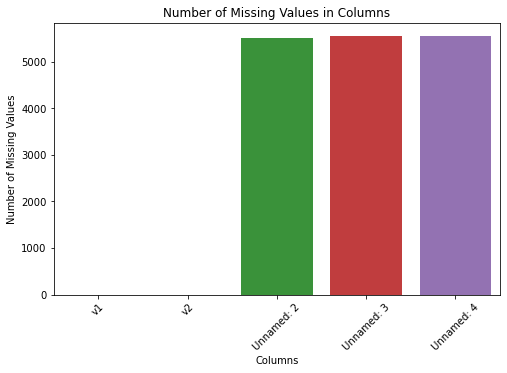

In [71]:
missing_counts = df.isnull().sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in Columns')
plt.xticks(rotation=45)  
plt.show()

**Columns unnamed-2, unnamed-3, unnamed-4 have lot's of missing values so it's better to drop them**

In [72]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1)

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
df.columns = ['labels', 'data']

In [74]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:>

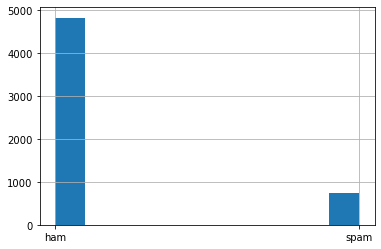

In [75]:
df['labels'].hist()

**Here the dataset is higly imbalanced dominated with high number of ham classes**

In [83]:
df['labels'] = df['labels'].map({"ham": 0, "spam": 1}) 
X = df['data'].to_list()
Y = df['labels'].to_numpy()

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size=0.25)

In [85]:
X_train

2558    Some friends want me to drive em someplace, pr...
2708                              Nah, I'm a perpetual DD
1018    Nope watching tv at home... Not going out. V b...
1379    No. 1 Nokia Tone 4 ur mob every week! Just txt...
2927                                          Anything...
                              ...                        
4078       O i played smash bros  &lt;#&gt;  religiously.
3736    Plz note: if anyone calling from a mobile Co. ...
597     You have an important customer service announc...
100     Okay name ur price as long as its legal! Wen c...
5204    How come she can get it? Should b quite diff t...
Name: data, Length: 4179, dtype: object

In [86]:
Y_train

array([nan, nan, nan, ..., nan, nan, nan])

In [87]:
# vectorizer = CountVectorizer()

# X_train = vectorizer.fit_transform(X_train)

# X_test = vectorizer.transform(X_test)

In [90]:
class NaiveBayesClassifier:

    def __init__(self):
        """Initialize the NaiveBayesClassifier."""
        self.class_probs = {}
        self.word_probs = {}

    def fit(self, X, y):
        """
            Train the Naive Bayes classifier on a training dataset.

            Args:
                X : Training samples.
                y : Target Values.

            This method calculates class probabilities (P(class)) and word probabilities
            (P(word | class)) based on the provided training data. It uses these
            probabilities to build a Naive Bayes classifier.
        """
        total_samples = len(y)
        classes = set(y)
        self.class_probs = {}
        for c in classes:
            self.class_probs[c] = sum(1 for label in y if label == c) / total_samples

        # Calculate word probabilities P(word | class)
        self.word_probs = {}
        for c in classes:
            self.word_probs[c] = {}
#             print([X[i]for i in range(total_samples)])
            class_samples = [X[i] for i in range(total_samples) if y[i] == c] 
            class_text = " ".join(class_samples).split()
            total_words = len(class_text)
            unique_words = set(class_text)
            for word in unique_words:
                self.word_probs[c][word] = class_text.count(word) / total_words

    def predict(self, x):
        """
            This method predicts the class label for a new sample based on the trained
            Naive Bayes classifier. It calculates the probability of each class for the
            given sample and assigns the sample to the class with the highest probability.

            Args:
                x (str): New sample (text).

            Returns:
                str: Predicted class label.
        """
        best_class, best_prob = None, -1
        for c in self.class_probs:
            prob = self.class_probs[c]
            for word in x.split():
                if word in self.word_probs[c]:
                    prob *= self.word_probs[c][word]
            if best_class is None or prob > best_prob:
                best_class, best_prob = c, prob
        return best_class


In [91]:
model = NaiveBayesClassifier()

model.fit(X_train, Y_train)

In [ ]:
pred = []
for test_data in X_test:
    pred.append(model.predict(test_data))

print(confusion_matrix(y_test, pred))


In [ ]:
print(f"F1-Score: {f1_score(y_test, pred)}")